<a href="https://colab.research.google.com/github/jjlopezre/PDS/blob/main/Ex10filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10.Realize illustrative example on EEG signals - a channel of a trial, of the implementation of a digital bandpass filter at alpha [8-12] Hz, comparing the following types of response:
# -Bessel, Butterworth, Chevyshev, Elliptical




# Nueva sección

##  1. Signal representation

In [ ]:
# Cargar base de datos
#id del archivo: 1sui-FJI5znNJuQOk0whM6PALI89XfKss
FILEID = "1sui-FJI5znNJuQOk0whM6PALI89XfKss"
#1sui-FJI5znNJuQOk0whM6PALI89XfKss
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19



#importar paquetes
#importar carpeta con funciones
import sys
#agregar carpeta con funciones
sys.path.insert(1, './CodesBCIITL')
%matplotlib inline
from MIfunctions import * #importar todas las funciones de manejo de eeg con mne

import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_edf
from mne.decoding import CSP
import pandas as pd
import json as  js #conda install -c jmcmurray json
import warnings


from numpy import matlib
import os
from ipywidgets import interact


from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
from mne import Epochs, pick_types, events_from_annotations

#crear carpeta con resultados
from google.colab import files
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import shutil
from datetime import date, datetime


#cargar datos
#Descripcion base de datos
#https://drive.google.com/file/d/1354HvKfp8sMckvN2t3SR9OUo9Z0yE9Uv/view?usp=sharing

sbj = 3 #sujeto facil s03, sujeto dificil s02
name = './CodesBCIITL/data/A0' + str(sbj)
filename_train = name+'T.gdf'
Ch = np.arange(0,22)# lectura canales eeg
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
clases = [769,770] # clases izquierda y derecha -> extender a pies y lengua
vt = [-1.5,3.5] #escoger ventana de analisis : -li:lf desde el estimulo cue # probar con ventana de 1 seg
#vt = [1.5,0.5] #escoger ventana de analisis : -li:lf desde el estimulo cue # probar con ventana de 1 seg
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
i_muestras, i_clases, raw, Xraw, y, ni,m = leer_bci42a_train_full(filename_train,clases,Ch,vt)
fs = raw.info['sfreq'] #frecuencia de muestreo

--2021-08-26 23:01:14--  https://docs.google.com/uc?export=download&confirm=offZ&id=1sui-FJI5znNJuQOk0whM6PALI89XfKss
Resolving docs.google.com (docs.google.com)... 108.177.127.100, 108.177.127.102, 108.177.127.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-8g-docs.googleusercontent.com/docs/securesc/5c6fg9l3vnl9kh1rsafkr1nbpmj6qms9/ikie9k6phpeqgucjcrjkjnobe5aft6gm/1630018800000/09173029842254050324/15337100857530172462Z/1sui-FJI5znNJuQOk0whM6PALI89XfKss?e=download [following]
--2021-08-26 23:01:14--  https://doc-0g-8g-docs.googleusercontent.com/docs/securesc/5c6fg9l3vnl9kh1rsafkr1nbpmj6qms9/ikie9k6phpeqgucjcrjkjnobe5aft6gm/1630018800000/09173029842254050324/15337100857530172462Z/1sui-FJI5znNJuQOk0whM6PALI89XfKss?e=download
Resolving doc-0g-8g-docs.googleusercontent.com (doc-0g-8g-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Conne

## Select of trial and channel 
### trial a number in range [0,115] and Channel [0,21]

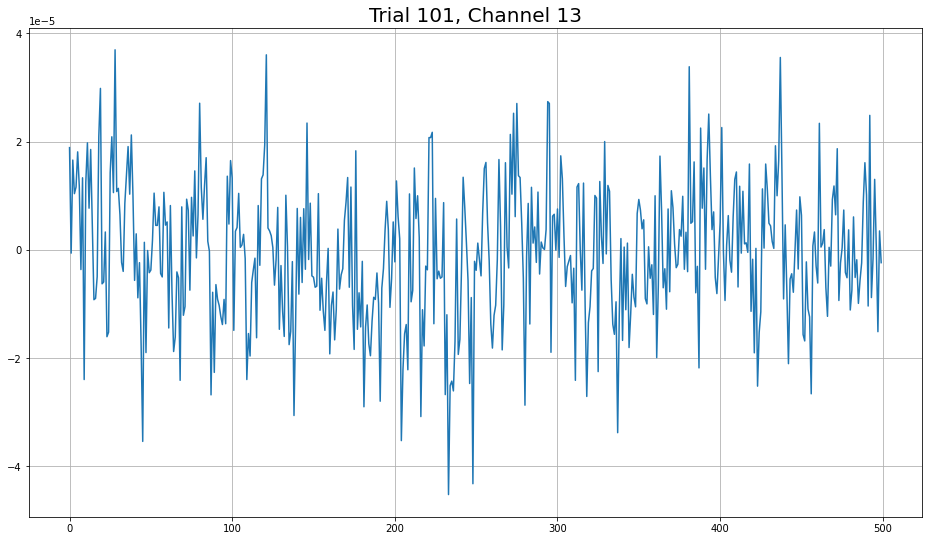

In [ ]:
import random
trial = 100
channel = 12

plt.figure(figsize=(16,9))
plt.plot(Xraw[trial,channel])
plt.title(f"Trial {trial+1}, Channel {channel+1}",fontsize=20)
plt.grid()
plt.show()

## Implement digital band pass filter and comparison of response types Bessel, Butterworth, Chevyshev, Elliptical

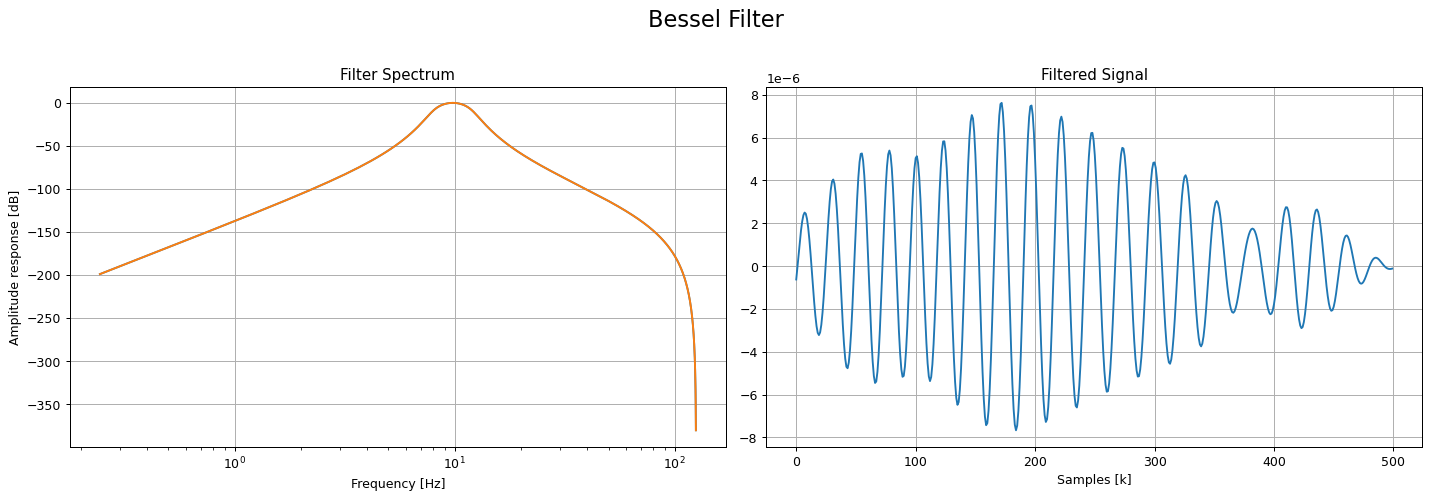

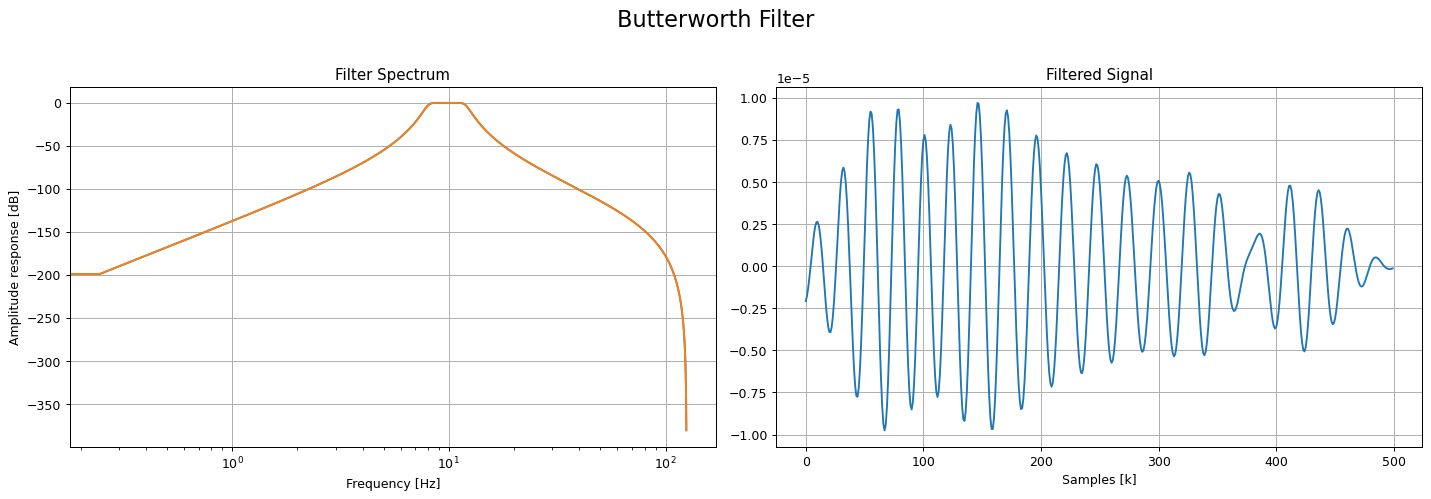

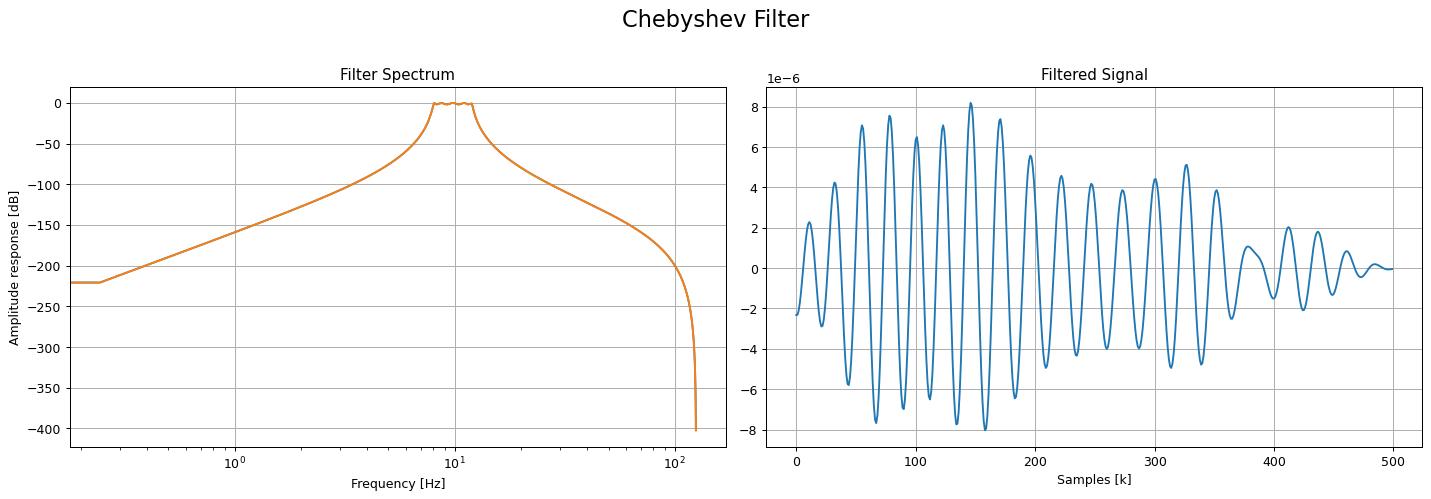

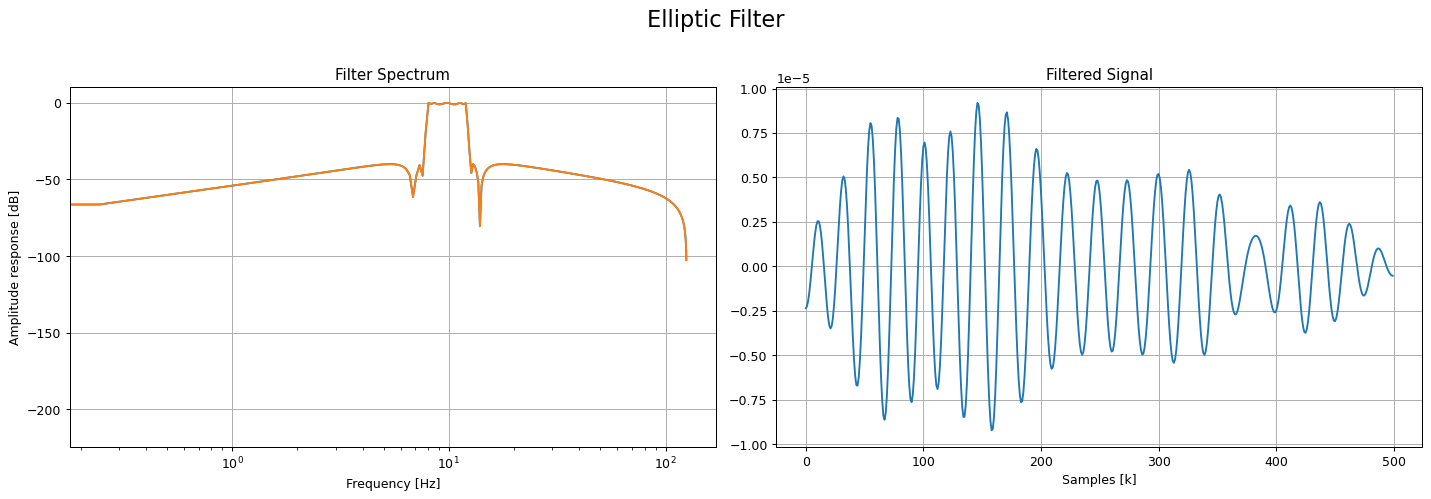

In [ ]:
from scipy import signal

data = Xraw[trial,channel]

filters = ['Bessel', 'Butterworth', 'Chebyshev', 'Elliptic']

lowcut = 8 
highcut = 12
order = 5
hfs = 0.5 * fs
low = lowcut / hfs
high = highcut / hfs


for filter in filters:

  plt.figure(figsize=(16,5),dpi=90)


  if (filter == "Bessel"):
    plt.suptitle(f"{filter} Filter",fontsize=18,y=1.1)
    b, a = signal.bessel(order,[low, high], btype='band')
  elif (filter == "Butterworth"):
    plt.suptitle(f"{filter} Filter",fontsize=18,y=1.1)
    b, a = signal.butter(order,[low, high], btype='band')
  elif (filter == "Chebyshev"):
    plt.suptitle(f"{filter} Filter",fontsize=18,y=1.1)
    b, a = signal.cheby1(order,2,[low, high], btype='band', )
  elif (filter == "Elliptic"):
    plt.suptitle(f"{filter} Filter",fontsize=18,y=1.1)
    b, a = signal.ellip(order,1,40,[low, high], btype='band', )


  w, h = signal.freqz(b,a,fs=fs)

  plt.subplot(121)
  plt.plot(w, 20 * np.log10(abs(h)))
  
  plt.semilogx(w, 20 * np.log10(abs(h)))
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude response [dB]')
  plt.grid()
  plt.title("Filter Spectrum")

  plt.subplot(122)
  
  plt.plot(signal.filtfilt(b,a,data))
  plt.grid()
  plt.xlabel("Samples [k]")
  plt.title("Filtered Signal")
  
  plt.tight_layout()
  plt.show()

#Juan José López Rendón